# Heart Failure Prediction Using ANN

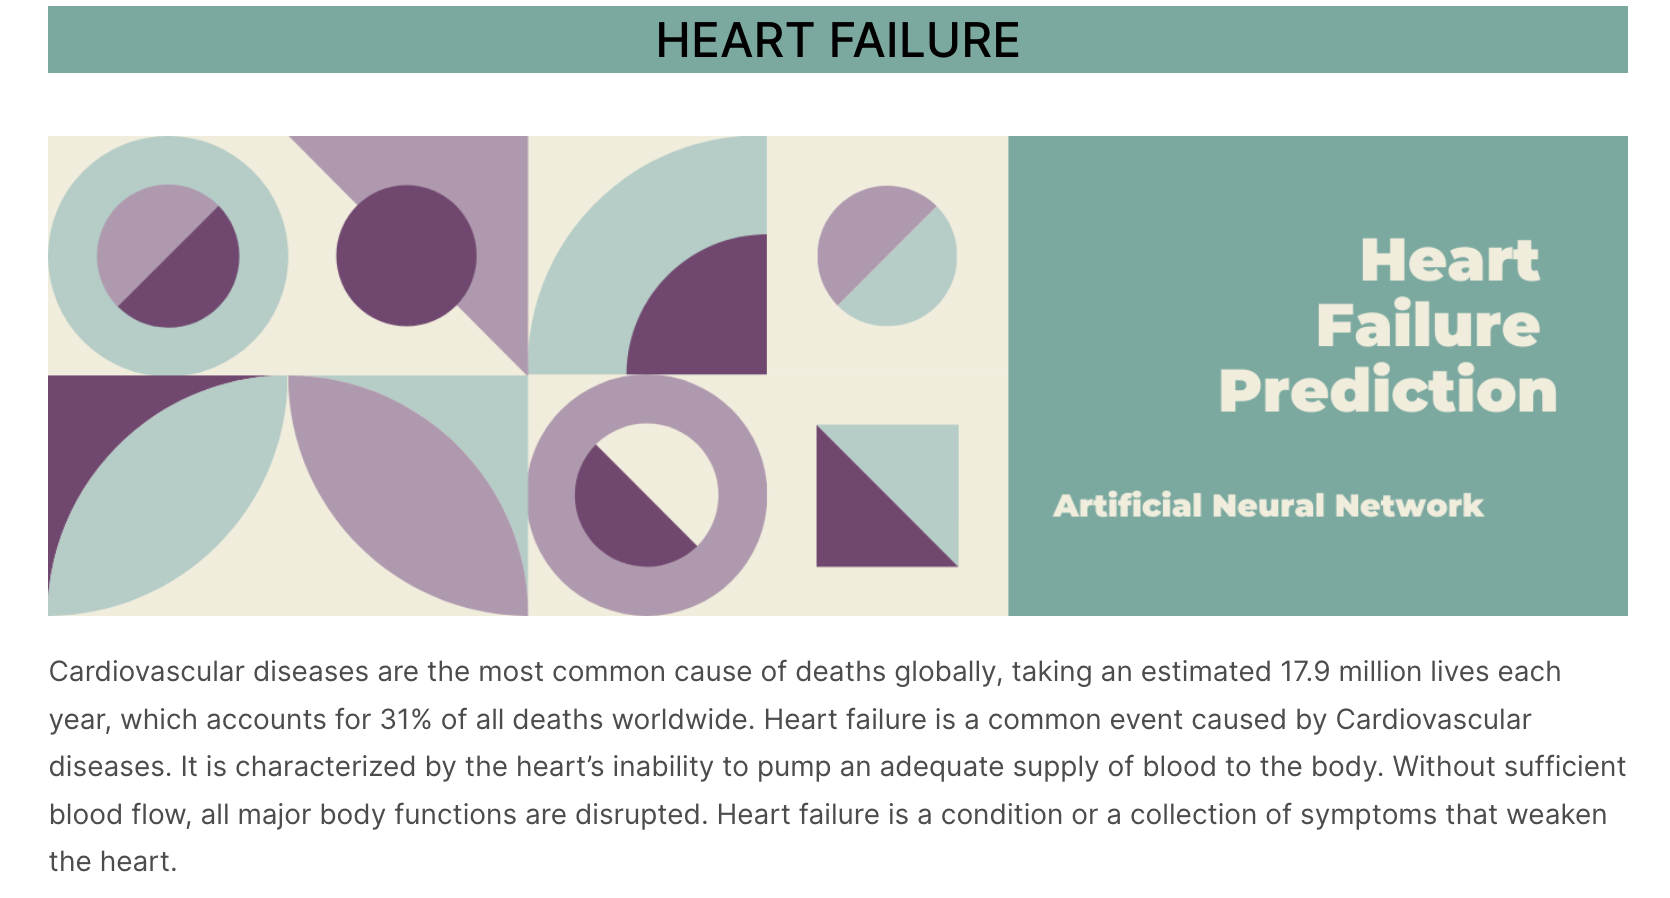

In [40]:
from IPython.display import Image
Image("ws.jpg")

# TABLE OF CONTENTS

     1- IMPORTING LIBRARIES

     2- LOADING DATASET
     
     3- Define Keras Model

     4- Compile Keras Model
     
     5- Fit Keras Model
     
     6- Evaluate Keras Model
     
     7- Make Predictions

The dataset used to train ANN models to predict whether a patient with heart failure is likely to die during the follow-up period. 
This information can be used to help doctors make better decisions about patient care.

# 1.Importing Libraries

In [2]:
#IMPORTING LIBRARIES

import numpy as np              
import pandas as pd             
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-10-03 20:03:22.620282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2.Loading the data

In [4]:
#loading dataset
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
data_df.shape

(299, 13)

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#Defining independent and dependent attributes in training and test sets
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]           

In [6]:
X.shape

(299, 12)

In [7]:
y.shape

(299,)

# 3. Define Keras Model

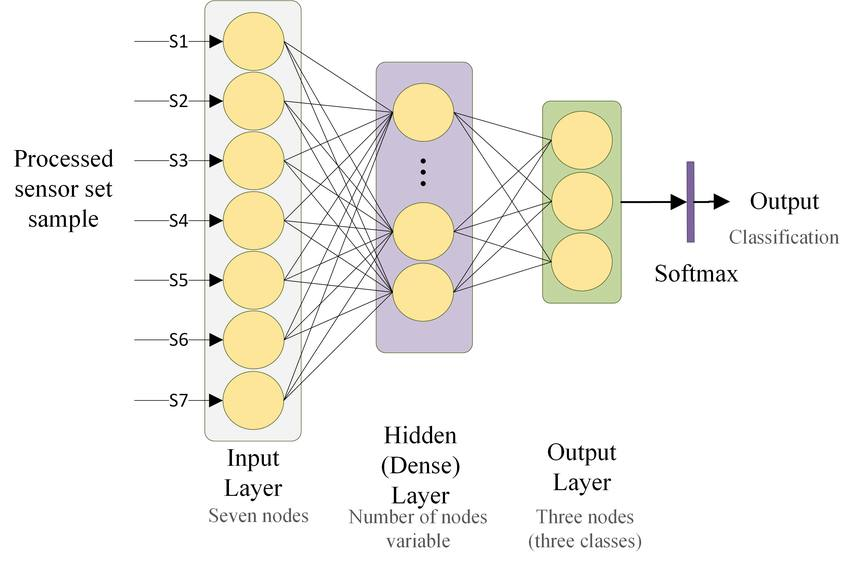

In [41]:
Image("ws1.jpg")

In [8]:
#MODEL BUILDING . Artificial Neural Network (ANN)
model = Sequential() 

In [9]:

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12)) 


model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



# 4. Compile Keras Model

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Fit Keras Model

In [33]:
model.fit(X, y, epochs=250, batch_size=200)


Epoch 1/250
2/2 [==============================] - 0s 6ms/step - loss: 0.4431 - accuracy: 0.8361
Epoch 2/250
2/2 [==============================] - 0s 10ms/step - loss: 0.4421 - accuracy: 0.8328
Epoch 3/250
2/2 [==============================] - 0s 27ms/step - loss: 0.4483 - accuracy: 0.8127
Epoch 4/250
2/2 [==============================] - 0s 8ms/step - loss: 0.4591 - accuracy: 0.7993
Epoch 5/250
2/2 [==============================] - 0s 10ms/step - loss: 0.4482 - accuracy: 0.8227
Epoch 6/250
2/2 [==============================] - 0s 15ms/step - loss: 0.4387 - accuracy: 0.8361
Epoch 7/250
2/2 [==============================] - 0s 12ms/step - loss: 0.4519 - accuracy: 0.8294
Epoch 8/250
2/2 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8194
Epoch 9/250
2/2 [==============================] - 0s 12ms/step - loss: 0.4405 - accuracy: 0.8428
Epoch 10/250
2/2 [==============================] - 0s 6ms/step - loss: 0.4457 - accuracy: 0.8294
Epoch 11/250
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 0.4400 - accuracy: 0.8060
Epoch 168/250
2/2 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8060
Epoch 169/250
2/2 [==============================] - 0s 6ms/step - loss: 0.4262 - accuracy: 0.8227
Epoch 170/250
2/2 [==============================] - 0s 7ms/step - loss: 0.4569 - accuracy: 0.8127
Epoch 171/250
2/2 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8127
Epoch 172/250
2/2 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.8194
Epoch 173/250
2/2 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8395
Epoch 174/250
2/2 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8462
Epoch 175/250
2/2 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8127
Epoch 176/250
2/2 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8462
Epoch 177/250
2/2 [=====

# 6. Evaluate Keras Model

In [45]:
#Compute the accuracy of the model
_,accuracy = model.evaluate(X, y)

10/10 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8495


In [46]:
print('Accuracy: %.2f' % (accuracy*100)+'%')

Accuracy: 84.95%


It is considered good result

# 7. Make Predictions

In [36]:
#Make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

10/10 [==============================] - 0s 1ms/step


In [42]:
for i in range(5):
    print('%s => %d (expected %d)' % (X.iloc[i].tolist(), predictions[i], y.iloc[i]))


[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0] => 1 (expected 1)
[55.0, 0.0, 7861.0, 0.0, 38.0, 0.0, 263358.03, 1.1, 136.0, 1.0, 0.0, 6.0] => 1 (expected 1)
[65.0, 0.0, 146.0, 0.0, 20.0, 0.0, 162000.0, 1.3, 129.0, 1.0, 1.0, 7.0] => 1 (expected 1)
[50.0, 1.0, 111.0, 0.0, 20.0, 0.0, 210000.0, 1.9, 137.0, 1.0, 0.0, 7.0] => 1 (expected 1)
[65.0, 1.0, 160.0, 1.0, 20.0, 0.0, 327000.0, 2.7, 116.0, 0.0, 0.0, 8.0] => 1 (expected 1)


/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_57915/493579699.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X.iloc[i].tolist(), predictions[i], y.iloc[i]))


We can see the model predicted the data correctly 

# References

1-https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

